# Python translation of R code for econometrics II examples

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# read in the data
df = pd.read_stata('https://data.nber.org/morg/annual/morg20.dta')

In [3]:
# remove all observations (rows) with at least one na value

In [5]:
# select relevant columns
df_ = df[['uhourse','earnwke','sex','grade92','age']].copy()
df_ = df_.dropna()

In [6]:
# get the hourly wage (weekly wage / number of hours per week)
# drop values of > 50'000 / week
df_['wage'] = df_.earnwke/df.uhourse
df_ = df_[df_.wage < 50000].copy()

In [7]:
# select number of hours worked in a week > 10, aged between 25 and 65
df_ = df_.loc[(df_.uhourse > 10) & (df_.age > 24) & (df_.age < 66)].copy()

In [8]:
# correct education to standard grade levels
edukey = {'31':0, '32':2.5, '33':5.5, '34':7.5, '35':9, '36':10, '37':11, '38':12,'39':12, '40':13, '41':14,'42':14,'43':16, '44':18,'45':18,'46':18}
df_.grade92 = df_.grade92.apply(lambda x: str(x))
mylist = []
for i in df_.grade92:
    try:
        a = edukey[i]
        mylist.append(a)
    except:
        a = 'NAN'
        mylist.append(a)

df_['edu_real'] = mylist


# combine all observations with less than 7.5 years education into one category.
def fix_the_ed(x):
    if (x <= 7.5):
        return 7.5
    else:
        return x
df_.edu_real = df_.edu_real.apply(lambda x: fix_the_ed(x))

In [9]:
#df_.to_csv('data/data-1.csv')

In [10]:
table_1 = pd.DataFrame(df_.groupby(['edu_real']).size())

In [11]:
table_1.columns = ['frequency']
table_1['sample probability'] = (table_1.frequency)/(len(df_))
table_1

,frequency,sample probability
edu_real,,
7.5,1903,0.018130
9.0,762,0.007260
10.0,729,0.006945
11.0,1065,0.010146
12.0,26443,0.251924
13.0,15244,0.145231
14.0,12215,0.116373
16.0,28555,0.272046
18.0,18048,0.171945


In [12]:
df_

,uhourse,earnwke,sex,grade92,age,wage,edu_real
1,40.0,800.00,1,39,50,20.000000,12.0
14,35.0,387.50,2,39,26,11.071429,12.0
15,40.0,2269.23,1,39,44,56.730750,12.0
16,40.0,769.23,2,43,43,19.230750,16.0
18,50.0,1267.50,1,40,32,25.350000,13.0
...,...,...,...,...,...,...,...
271242,40.0,961.53,1,43,34,24.038250,16.0
271243,40.0,942.30,2,43,35,23.557500,16.0
271245,40.0,1400.00,1,40,54,35.000000,13.0
271249,36.0,1161.00,2,43,30,32.250000,16.0


In [13]:
## make histogram... to be continued

In [14]:
df_.reset_index(inplace=True, drop = False)

In [15]:
melted = df_.melt(id_vars=['edu_real'],value_vars = 'wage')

In [16]:
melted  = melted[melted.value < 150]

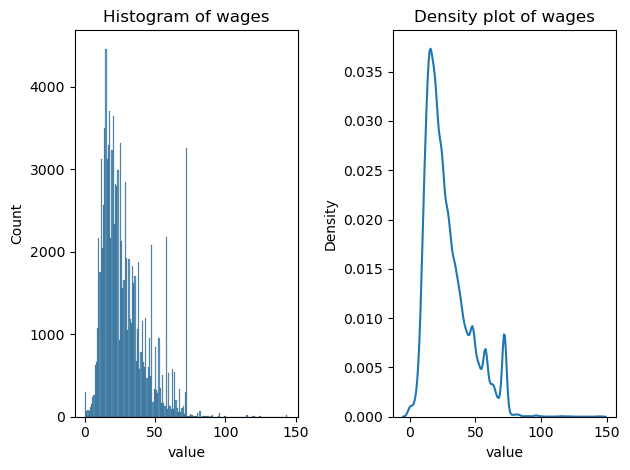

In [17]:
# figures 1 and 2 density and histogram of wages
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,2)
sns.histplot(data = melted,x = 'value',ax = axs[0])
axs[0].set_title('Histogram of wages')
sns.kdeplot(data = melted,x = 'value',ax = axs[1])
axs[1].set_title('Density plot of wages')
plt.tight_layout()
plt.show()

In [18]:
# men and women frequencies and probabilities
# rounded to nearest whole for convencience
grouped = df_.groupby(['sex','edu_real']).size()
size_men = len(df_[df_.sex == 1])
size_women = len(df_[df_.sex == 2])
table_2=grouped.reset_index()
table_2 = table_2.pivot(index='sex',columns = 'edu_real')
table_2.columns = [x[1] for x in table_2.columns]
table_2.index = ['men','women']
table_2_percent = round((table_2.div(table_2.sum(axis=1), axis=0))*100)
table_2 = pd.concat([round(table_2),table_2_percent],axis = 0)

In [19]:
table_2

,7.5,9.0,10.0,11.0,12.0,13.0,14.0,16.0,18.0
men,1227.0,473.0,426.0,648.0,15355.0,7896.0,5773.0,13769.0,8153.0
women,676.0,289.0,303.0,417.0,11088.0,7348.0,6442.0,14786.0,9895.0
men,2.0,1.0,1.0,1.0,29.0,15.0,11.0,26.0,15.0
women,1.0,1.0,1.0,1.0,22.0,14.0,13.0,29.0,19.0


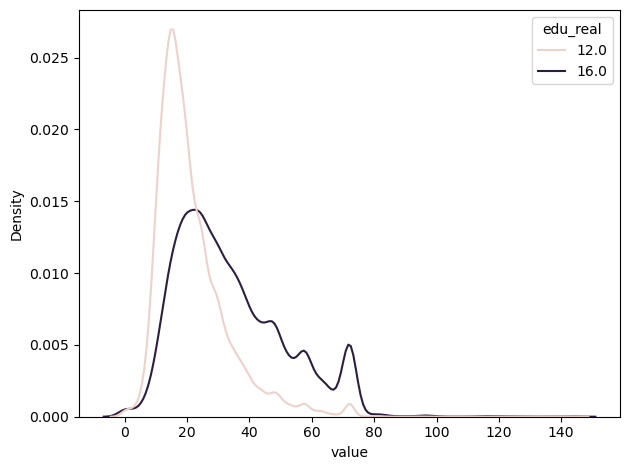

In [20]:
# figures 3  slide 15 density and histogram of wages
sns.color_palette("flare", as_cmap=True)
fig,axs = plt.subplots()
mydata = melted[(melted.edu_real == 12) | (melted.edu_real == 16)]
sns.kdeplot(data = mydata,x = 'value', hue = 'edu_real')
plt.tight_layout()
plt.show()

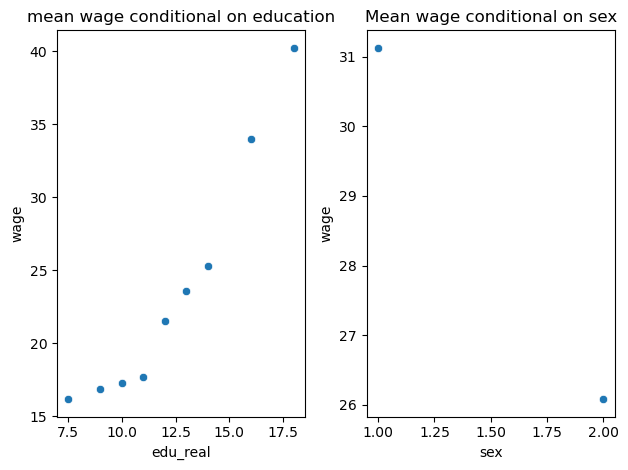

In [21]:
# slide 16

a = df_.groupby('edu_real').agg({'wage':'mean'})
b = df_.groupby('sex').agg({'wage':'mean'})
fig,axs = plt.subplots(1,2)
sns.scatterplot(data = a,x = a.index,y = 'wage',ax = axs[0])
axs[0].set_title('mean wage conditional on education')
sns.scatterplot(data = b,x = b.index,y= 'wage',ax = axs[1])
axs[1].set_title('Mean wage conditional on sex')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='age', ylabel='wage'>

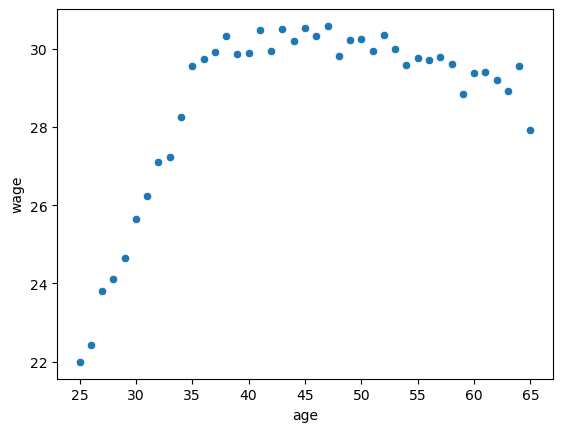

In [26]:
# slide 18
c= df_.groupby(['age']).agg({'wage':'mean'})
sns.scatterplot(data = c,x = c.index,y = 'wage')

In [23]:
c = c.reset_index(drop=False)

In [25]:
# potential use of Mayavi library for 3d visualization? Not sure the best way to approch 
# this one.

import numpy as np
from scipy import stats
from mayavi import mlab
data=df_
values = data.T

kde = stats.gaussian_kde(values)

# Create a regular 3D grid with 50 points in each dimension
xmin, ymin, zmin = data.min(axis=0)
xmax, ymax, zmax = data.max(axis=0)
xi, yi, zi = np.mgrid[xmin:xmax:50j, ymin:ymax:50j, zmin:zmax:50j]

# Evaluate the KDE on a regular grid...
coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
density = kde(coords).reshape(xi.shape)

# Visualize the density estimate as isosurfaces
mlab.contour3d(xi, yi, zi, density, opacity=0.5)
mlab.axes()
mlab.show()


ModuleNotFoundError: No module named 'mayavi'

In [ ]:
a

In [ ]:
a.columns

In [ ]:
# conditional mean wage on education level
sns.scatterplot(data = a, x = a.index,y = 'wage')